# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | lihue
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | xianyang
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | cheongsong gun
Processing Record 9 of Set 1 | tvoroyri
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | mugia
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | axim
Processing Record 19 of Set 1 | manta
Processing Record 20 of Set 1 | trapani
Processing Record 21 of Set 1 | bahia de kino
Processing Record 22 of Set 1 | chibougamau
Processing Record 23 of Set 1 | tofol
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,19.42,79,32,0.00,GL,1731290871
1,lihue,21.9789,-159.3672,78.39,85,100,13.80,US,1731290836
2,new norfolk,-42.7826,147.0587,67.71,18,2,3.29,AU,1731290873
3,kodiak,57.7900,-152.4072,38.71,81,75,10.36,US,1731290875
4,olonkinbyen,70.9221,-8.7187,33.89,92,100,20.24,SJ,1731290876


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,19.42,79,32,0.00,GL,1731290871
1,lihue,21.9789,-159.3672,78.39,85,100,13.80,US,1731290836
2,new norfolk,-42.7826,147.0587,67.71,18,2,3.29,AU,1731290873
3,kodiak,57.7900,-152.4072,38.71,81,75,10.36,US,1731290875
4,olonkinbyen,70.9221,-8.7187,33.89,92,100,20.24,SJ,1731290876


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

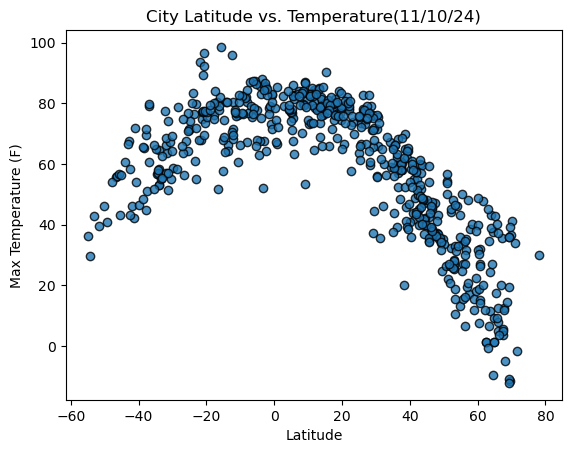

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature(%s)" %time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

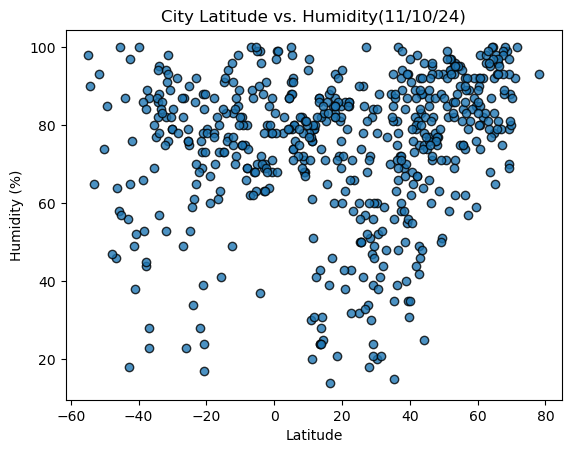

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)" %time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid=(True)


# Save the figure
plt.savefig("output_data/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

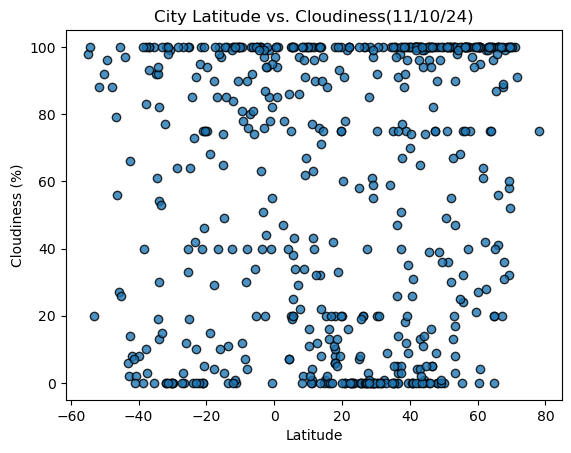

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(%s)" %time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid=(True)


# Save the figure
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

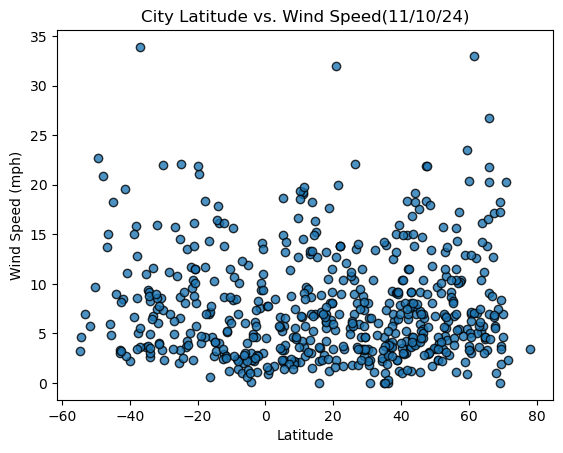

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(%s)" %time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid=(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    print(f"The correlation between both factors is {round(rvalue,2)}")
    return plt.plot(x_values,regress_values,"r-")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,19.42,79,32,0.00,GL,1731290871
1,lihue,21.9789,-159.3672,78.39,85,100,13.80,US,1731290836
3,kodiak,57.7900,-152.4072,38.71,81,75,10.36,US,1731290875
4,olonkinbyen,70.9221,-8.7187,33.89,92,100,20.24,SJ,1731290876
5,xianyang,34.3378,108.7026,59.16,88,100,2.24,CN,1731290779


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,67.71,18,2,3.29,AU,1731290873
6,codrington,-38.2667,141.9667,65.17,53,40,15.88,AU,1731290878
9,waitangi,-43.9535,-176.5597,60.82,87,97,8.99,NZ,1731290882
12,kruisfontein,-34.0033,24.7314,53.19,88,82,2.57,ZA,1731290885
13,papatowai,-46.5619,169.4708,55.74,46,79,13.71,NZ,1731290887


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.783590496835453
The correlation between both factors is -0.89


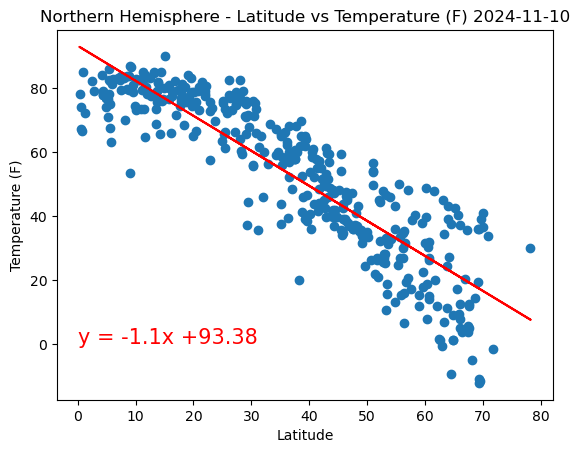

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Temperature (F)", "Northern", (0, 0))

# Save the figure
plt.savefig("output_data/North_Linear_Temp.png")


The r-squared is: 0.48715607380415865
The correlation between both factors is 0.7


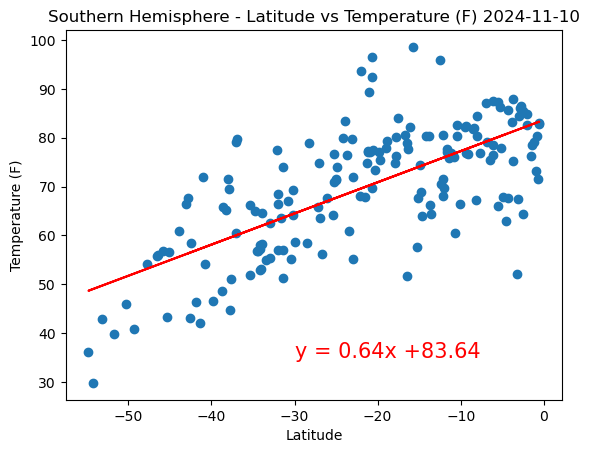

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Temperature (F)", "Southern", (-30, 35))

# Save the figure
plt.savefig("output_data/South_Linear_Temp.png")


The correlation coefficient of -0.87 for the Northern Hemispher indicates a strong positive linear relationship between latitude and temperature. This means that as the latitude increases, temperature generally tends to decrease. The correlation coefficient of 0.73 for the Southern Hemispher indicates a strong positive linear relationship between latitude and temperature. This means that as latitude increases, temperature generally tends to increase as well.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08063061382905751
The correlation between both factors is 0.28


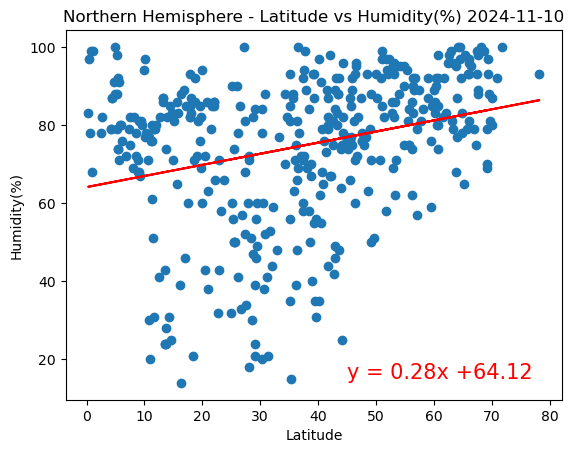

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity(%)", "Northern", (45, 15))

# Save the figure
plt.savefig("output_data/North_Linear_Humidity.png")


The r-squared is: 0.012370409257719322
The correlation between both factors is 0.11


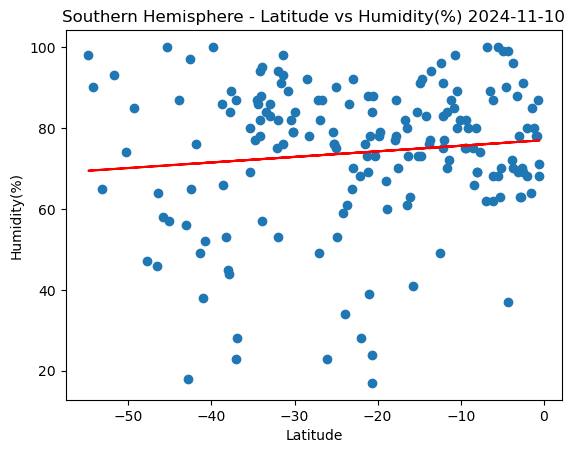

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity(%)", "Southern", (-25, 10))

# Save the figure
plt.savefig("output_data/South_Linear_Humidity.png")



The correlation coefficient for the Northern and Southen Hemisphere are very similar indicating a weak, positive linear relationship between latitude and humidity. This means that as latitude increases, humidity tends to increase slightly, but the relationship is negligible. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05374113223471135
The correlation between both factors is 0.23


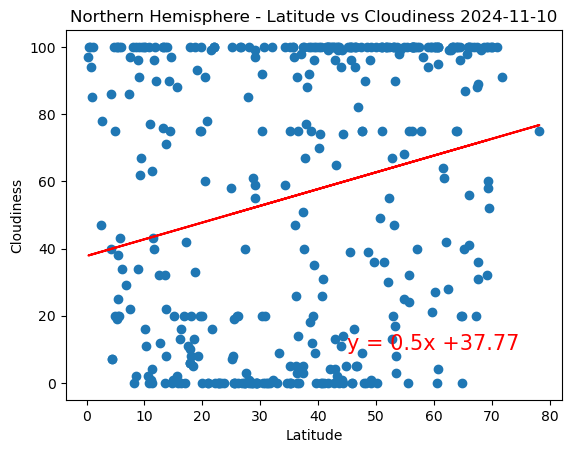

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness", "Northern", (45, 10))

# Save the figure
plt.savefig("output_data/North_Linear_Cloudiness.png")


The r-squared is: 0.029840982281216462
The correlation between both factors is 0.17


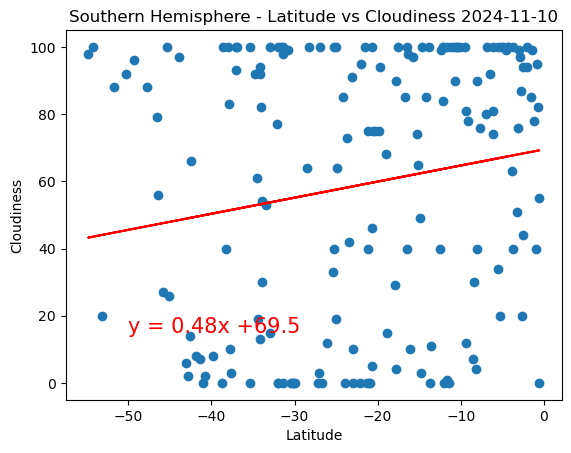

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-50, 15))

# Save the figure
plt.savefig("output_data/South_Linear_Cloudiness.png")


Both the Northern and Southern Hemispher have a correlation coefficient that indicates a weak, positive linear relationship between latitude and cloudiness. This means that as latitude increases, cloudiness tends to increase slightly, but the relationship is not very strong.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0070275973425865165
The correlation between both factors is 0.08


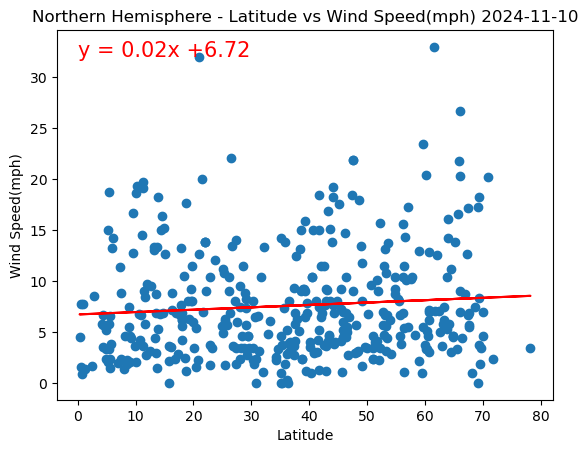

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed(mph)", "Northern", (0, 32))

# Save the figure
plt.savefig("output_data/North_Linear_Windspeed.png")


The r-squared is: 0.043620809809118574
The correlation between both factors is -0.21


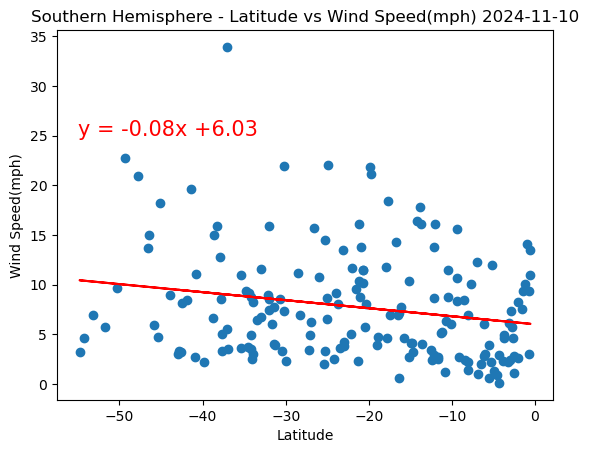

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed(mph)", "Southern", (-55, 25))

# Save the figure
plt.savefig("output_data/South_Linear_Windspeed.png")


The correlation coefficient of 0.15 for the Northern Hemisphere indicates a weak, positive linear relationship between latitude and wind speed. This means that as latitude increases, wind speed tends to increase slightly, but the relationship is not very strong. The correlation coefficient of -0.35  for the Southern Hemisphere indicates a moderate, negative linear relationship between latitude and wind speed. This means that as latitude increases, wind speed tends to decrease slightly.